Mục tiêu: kiểm tra file `crawled_all_shops/data_hcm_huy_final.csv` merge đúng chưa

---

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
data_hcm_huy = pd.read_csv('./crawled_all_shops/data_hcm_huy_final.csv')
print(data_hcm_huy.shape)
data_hcm_huy.head()

(93047, 32)


C:\Users\Admin\AppData\Local\Temp\ipykernel_13784\16579015.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data_hcm_huy = pd.read_csv('./crawled_all_shops/data_hcm_huy_final.csv')


,RestaurantId,Name,Address,District,City,RestaurantStatus,Latitude,Longitude,TotalReviews,nExcellentReviews,...,IsBooking,IsDelivery,PrepTime,Capacity,LastHourCustomer,ExtraInfo,Active,TotalFavourites,TotalCheckIns,Comment
0,5469.0,Crystal Jade Palace - Lotte Legend Saigon Hotel,"Legend Hotel, 2A - 4A Tôn Đức Thắng, P. Bến Nghé",Quận 1,TP. HCM,2.0,10.778231,106.706997,609.0,502.0,...,False,True,"['5', '10']",150.0,22:00,"Có wifi, Có máy lạnh & điều hòa, Trả bằng thẻ,...",True,NaN,NaN,{'Crystal Jade Palace - Lotte Legend Saigon Ho...
1,43229.0,Ming Court Restaurant - Hotel Nikko Saigon,"Hotel Nikko Saigon, 235 Nguyễn Văn Cừ, P. Phạm...",Quận 1,TP. HCM,2.0,10.764356,106.682750,25.0,6.0,...,False,False,"['10', '15']",202.0,21:45,"Có wifi, Có máy lạnh & điều hòa, Trả bằng thẻ,...",True,NaN,NaN,{'Ming Court Restaurant - Hotel Nikko Saigon':...
2,5764.0,Fuji Japanese Restaurant 富士 - Nikko Saigon Hotel,"Tầng Trệt Nikko Saigon Hotel, 235 Nguyễn Văn C...",Quận 1,TP. HCM,2.0,10.763921,106.682962,38.0,7.0,...,False,False,"['5', '10']",200.0,22:00,"Có wifi, Có máy lạnh & điều hòa, Trả bằng thẻ,...",True,NaN,NaN,{'Ngon-Đẳng cấp': 'Ngon không chê vào đâu được...
3,107609.0,The LOG Restaurant,"Rooftop, GEM Center, 8 Nguyễn Bỉnh Khiêm",Quận 1,TP. HCM,2.0,10.790285,106.701944,251.0,44.0,...,False,False,"['10', '30']",400.0,23:00,"Có wifi, Có máy lạnh & điều hòa, Trả bằng thẻ,...",True,NaN,NaN,{'Không còn như xưa': 'Ghé nhà hàng sau 1 thời...
4,91179.0,Sorae Restaurant - Lounge,"Tầng 24 - 25, AB Tower, 76A Lê Lai",Quận 1,TP. HCM,2.0,10.770537,106.694305,251.0,60.0,...,False,False,"['10', '20']",150.0,00:30,"Có wifi, Có máy lạnh & điều hòa, Trả bằng thẻ,...",True,NaN,NaN,{'Quá bình thường và chậm tiến': 'Lần đầu mình...


# Khám phá dữ liệu

## Kiểm tra dòng trùng

In [6]:
print('trùng trên toàn bộ thuộc tính:', data_hcm_huy.duplicated().sum())
print('trùng trên thuộc tính RestaurantId:', data_hcm_huy['RestaurantId'].dropna().duplicated().sum())

trùng trên toàn bộ thuộc tính: 0
trùng trên thuộc tính RestaurantId: 0


## Kiểu dữ liệu mỗi cột

In [9]:
data_hcm_huy.dtypes

RestaurantId         float64
Name                  object
Address               object
District              object
City                  object
RestaurantStatus     float64
Latitude             float64
Longitude            float64
TotalReviews         float64
nExcellentReviews    float64
nGoodReviews         float64
nAverageReviews      float64
nBadReviews          float64
LocationScore        float64
PriceScore           float64
QualityScore         float64
ServingScore         float64
SpaceScore           float64
AvgScore             float64
TotalPictures        float64
TotalViews           float64
TotalSaves           float64
IsBooking               bool
IsDelivery              bool
PrepTime              object
Capacity              object
LastHourCustomer      object
ExtraInfo             object
Active                  bool
TotalFavourites      float64
TotalCheckIns        float64
Comment               object
dtype: object

## Phân bố giá trị

### Thuộc tính numerical

In [10]:
num_cols = data_hcm_huy.select_dtypes([np.float64]).columns
def missing_ratio(s):
    return s.isna().sum() * 100 / len(s)

data_hcm_huy[num_cols].agg([missing_ratio, pd.Series.min, pd.Series.max, pd.Series.nunique])

,RestaurantId,RestaurantStatus,Latitude,Longitude,TotalReviews,nExcellentReviews,nGoodReviews,nAverageReviews,nBadReviews,LocationScore,PriceScore,QualityScore,ServingScore,SpaceScore,AvgScore,TotalPictures,TotalViews,TotalSaves,TotalFavourites,TotalCheckIns
missing_ratio,0.000000e+00,0.0,0.003224,0.002149,45.025632,62.678001,62.678001,62.678001,62.678001,62.678001,62.678001,62.678001,62.678001,62.678001,45.025632,0.0,0.0,0.0,73.844401,73.844401
min,2.000000e+00,2.0,-0.001451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000
max,1.000059e+09,4.0,106.656876,108.458313,1513.000000,1290.000000,1045.000000,428.000000,719.000000,10.000000,10.000000,10.000000,10.000000,10.000000,143.000000,12488.0,459463.0,11100.0,603.000000,200.000000
nunique,9.304700e+04,2.0,82345.000000,83111.000000,469.000000,195.000000,302.000000,158.000000,106.000000,92.000000,93.000000,92.000000,93.000000,93.000000,96.000000,1267.0,9711.0,970.0,246.000000,67.000000


$\to$ max của `AvgScore` vô lý, phải từ 0-10. Có thể cào sai, sửa lại bằng cách lấy TB 5 cột điểm bên trái nó

In [16]:
data_hcm_huy['AvgScore'] = (data_hcm_huy['LocationScore'] + data_hcm_huy['PriceScore'] \
    + data_hcm_huy['PriceScore'] + data_hcm_huy['PriceScore'] + data_hcm_huy['PriceScore'])/5
data_hcm_huy['AvgScore'].agg([missing_ratio, pd.Series.min, pd.Series.max, pd.Series.nunique])    

missing_ratio     62.678001
min                0.000000
max               10.000000
nunique          683.000000
Name: AvgScore, dtype: float64

### Thuộc tính category

In [19]:
cat_cols = data_hcm_huy.select_dtypes(include=["object"])
cat_cols.apply([missing_ratio, pd.Series.nunique, pd.Series.unique])

,Name,Address,District,City,PrepTime,Capacity,LastHourCustomer,ExtraInfo,Comment
missing_ratio,0.0,0.0,0.0,0.0,0.099949,36.163444,76.837512,20.108117,0.148312
nunique,92629,81690,24,1,108,151,141,3056,34665
unique,[Crystal Jade Palace - Lotte Legend Saigon Hot...,"[Legend Hotel, 2A - 4A Tôn Đức Thắng, P. Bến N...","[Quận 1, Tp. Thủ Đức, Quận 10, Quận 2, Quận 7,...",[TP. HCM],"[['5', '10'], ['10', '15'], ['10', '30'], ['10...","[150.0, 202.0, 200.0, 400.0, 90.0, 75.0, 100.0...","[22:00, 21:45, 23:00, 00:30, 01:30, 23:30, 21:...","[Có wifi, Có máy lạnh & điều hòa, Trả bằng thẻ...",[{'Crystal Jade Palace - Lotte Legend Saigon H...


## Save to file

In [20]:
data_hcm_huy.to_csv('crawled_all_shops/data_hcm_final.csv', index = False, header=True, encoding='utf-8')

# Merge detail.csv & data_hcm_final.csv

In [3]:
data_hcm = pd.read_csv('./crawled_all_shops/data_hcm_final.csv')
details = pd.read_csv('./crawled_shop_details/details.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_15704\713071988.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data_hcm = pd.read_csv('./crawled_all_shops/data_hcm_final.csv')


In [13]:
data_hcm.shape, details.shape

((93047, 32), (54537, 14))

In [9]:
data_hcm = data_hcm.astype({"RestaurantId": int}, errors='raise') 
data_hcm = data_hcm.astype({"RestaurantId": str}, errors='raise')
data_hcm['RestaurantId'].dtype

In [12]:
result = pd.merge(data_hcm, details, how='left', left_on=['RestaurantId'], right_on = ['request_id'])
print(result.shape)
result.head()

(93047, 46)


,RestaurantId,Name,Address,District,City,RestaurantStatus,Latitude,Longitude,TotalReviews,nExcellentReviews,...,avg,service_fee,avg_price,min_order_value,min_charge,minimun_shiping_fee,is_foody_delivery,min_price,max_price,promotion
0,5469,Crystal Jade Palace - Lotte Legend Saigon Hotel,"Legend Hotel, 2A - 4A Tôn Đức Thắng, P. Bến Nghé",Quận 1,TP. HCM,2.0,10.778231,106.706997,609.0,502.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43229,Ming Court Restaurant - Hotel Nikko Saigon,"Hotel Nikko Saigon, 235 Nguyễn Văn Cừ, P. Phạm...",Quận 1,TP. HCM,2.0,10.764356,106.682750,25.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5764,Fuji Japanese Restaurant 富士 - Nikko Saigon Hotel,"Tầng Trệt Nikko Saigon Hotel, 235 Nguyễn Văn C...",Quận 1,TP. HCM,2.0,10.763921,106.682962,38.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,107609,The LOG Restaurant,"Rooftop, GEM Center, 8 Nguyễn Bỉnh Khiêm",Quận 1,TP. HCM,2.0,10.790285,106.701944,251.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,91179,Sorae Restaurant - Lounge,"Tầng 24 - 25, AB Tower, 76A Lê Lai",Quận 1,TP. HCM,2.0,10.770537,106.694305,251.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
result['cuisines'].unique()

array([nan, "['Món Nhật', 'Món Á']", "['Món Trung Hoa', 'Món Á']",
       "['Đức', 'Món Âu']", "['Món Việt']", '[]', "['Món Á', 'Đài Loan']",
       "['Món Nhật']", "['Singapore', 'Món Á']", "['Món Âu']",
       "['Món Hàn', 'Món Á']", "['Châu Mỹ', 'Mỹ']", "['Món Âu', 'Món Á']",
       "['Châu Mỹ', 'Món Âu']", "['Món Thái', 'Món Á']",
       "['Pháp', 'Món Âu']", "['Món Nhật', 'Món Âu']",
       "['Món Á', 'Campuchia']", "['Pháp', 'Mỹ']",
       "['Châu Mỹ', 'Mexico']", "['Món Việt', 'Món Miền Nam']",
       "['Món Việt', 'Món Á']", "['Món Việt', 'Món Trung Hoa']",
       "['Món Miền Nam']", "['Món Việt', 'Đài Loan']", "['Quốc tế']",
       "['Món Việt', 'Món Hàn']", "['Pháp', 'Món Nhật']", "['Món Á']",
       "['Món Việt', 'Ý']", "['Món Việt', 'Món Bắc']",
       "['Món Việt', 'Quốc tế']", "['Món Âu', 'Tây Ban Nha']",
       "['Món Việt', 'Món Âu']", "['Đông Âu', 'Tiệp (Séc)']", "['Úc']",
       "['Đông Âu', 'Thổ Nhĩ Kỳ']", "['Ý', 'Món Âu']",
       "['Tây Nguyên', 'Đà Lạt']", "['Món 

In [44]:
huy = pd.read_csv('crawled_all_shops/data_hcm_huy_final.csv')
huy.head(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15704\3429694721.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  huy = pd.read_csv('crawled_all_shops/data_hcm_huy_final.csv')


,RestaurantId,Name,Address,District,City,RestaurantStatus,Latitude,Longitude,TotalReviews,nExcellentReviews,...,IsBooking,IsDelivery,PrepTime,Capacity,LastHourCustomer,ExtraInfo,Active,TotalFavourites,TotalCheckIns,Comment
0,5469.0,Crystal Jade Palace - Lotte Legend Saigon Hotel,"Legend Hotel, 2A - 4A Tôn Đức Thắng, P. Bến Nghé",Quận 1,TP. HCM,2.0,10.778231,106.706997,609.0,502.0,...,False,True,"['5', '10']",150.0,22:00,"Có wifi, Có máy lạnh & điều hòa, Trả bằng thẻ,...",True,NaN,NaN,{'Crystal Jade Palace - Lotte Legend Saigon Ho...
1,43229.0,Ming Court Restaurant - Hotel Nikko Saigon,"Hotel Nikko Saigon, 235 Nguyễn Văn Cừ, P. Phạm...",Quận 1,TP. HCM,2.0,10.764356,106.682750,25.0,6.0,...,False,False,"['10', '15']",202.0,21:45,"Có wifi, Có máy lạnh & điều hòa, Trả bằng thẻ,...",True,NaN,NaN,{'Ming Court Restaurant - Hotel Nikko Saigon':...


In [ ]:
huy['ReviewUrl']

In [33]:
def missing_ratio(s):
    return s.isna().sum() * 100 / len(s)
result[['AvgScore', 'avg']].agg([missing_ratio, pd.Series.nunique, pd.Series.unique, pd.Series.min, pd.Series.max, pd.Series.mean])

,AvgScore,avg
missing_ratio,62.678001,41.437123
nunique,636,35
unique,"[9.44, 7.459999999999999, 7.139999999999999, 7...","[nan, 4.3, 4.7, 5.0, 4.9, 4.8, 0.0, 4.2, 4.0, ..."
min,0.0,0.0
max,10.0,5.0
mean,7.474926,3.462959


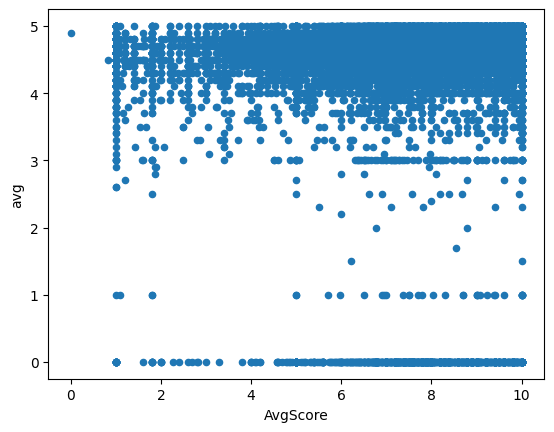

In [36]:
import matplotlib.pyplot as plt

result.plot.scatter(x='AvgScore', y='avg');

In [37]:
result[['TotalPictures']].agg([pd.Series.nunique, pd.Series.unique, pd.Series.min, pd.Series.max])

,TotalPictures
nunique,1267
unique,"[2512.0, 293.0, 409.0, 3135.0, 2753.0, 237.0, ..."
min,0.0
max,12488.0


In [38]:
result[['RestaurantId', 'TotalPictures']]

,RestaurantId,TotalPictures
0,5469,2512.0
1,43229,293.0
2,5764,409.0
3,107609,3135.0
4,91179,2753.0
...,...,...
93042,1000046983,0.0
93043,1000046931,0.0
93044,1000024385,0.0
93045,1000046284,0.0


In [30]:
result = result.astype({"avg": np.float64}, errors='raise')
result[['AvgScore', 'avg']].dtypes

AvgScore    float64
avg         float64
dtype: object

In [21]:


result[result['AvgScore'] == result['avg']]

,RestaurantId,Name,Address,District,City,RestaurantStatus,Latitude,Longitude,TotalReviews,nExcellentReviews,...,avg,service_fee,avg_price,min_order_value,min_charge,minimun_shiping_fee,is_foody_delivery,min_price,max_price,promotion


In [15]:
result.to_csv('crawled_all_shops/data_hcm_final.csv', index = False, header=True, encoding='utf-8')